In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#df['Fare'].dtype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

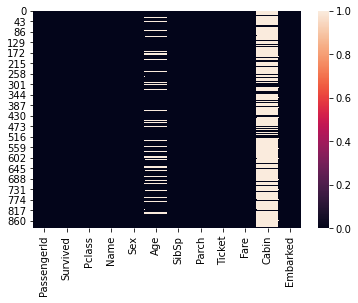

In [8]:
sns.heatmap(df.isnull())

null vlaue is present in tha Age and Cabin column

<AxesSubplot:xlabel='Age', ylabel='Density'>

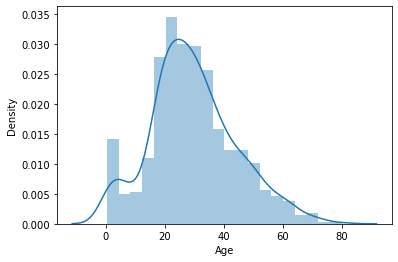

In [9]:
sns.distplot(df['Age'])

In [10]:
medianvalue = df["Age"].median()
df["Age"].fillna(medianvalue,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
modevalue = df["Cabin"].mode()[0]
df["Cabin"].fillna(modevalue,inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [17]:
#df['Embarked'].replace(np.NaN,df['Embarked'].mode,inplace = True)

In [18]:
mvalue= df["Embarked"].mode()[0]
df["Embarked"].fillna(mvalue,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [21]:
le = LabelEncoder()

In [22]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2


In [24]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.361582,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [26]:
df.shape

(891, 12)

In [27]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.060534,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


Here survived column is Target column and passengerid shows the most neg corr with the target column and fare has the most positive corr with the target column 

In [28]:
df.drop(["PassengerId"],axis = 1,inplace = True)

In [29]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,0,3,15,1,35.0,0,0,472,8.0500,47,2


<AxesSubplot:>

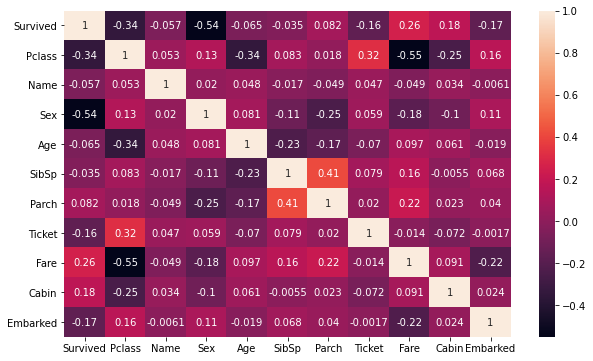

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [31]:
df.drop(["Name"],axis = 1,inplace = True)

In [32]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

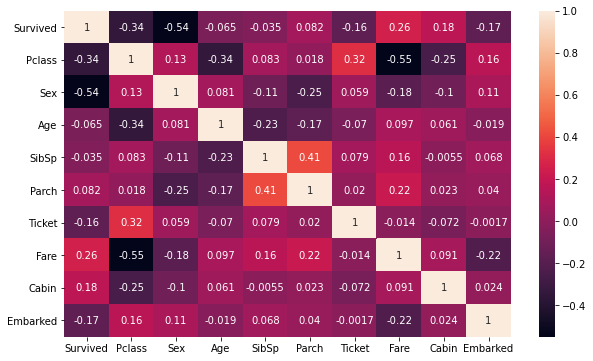

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

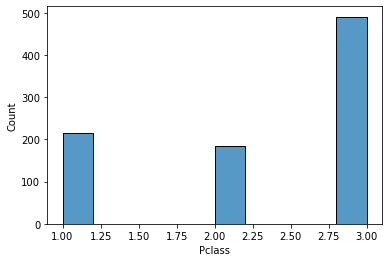

In [34]:
sns.histplot(x="Pclass", data= df,bins = 10)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

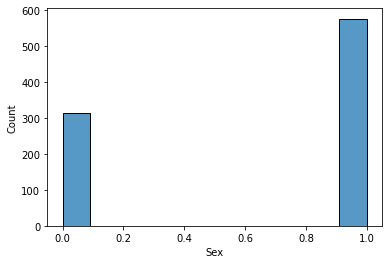

In [35]:
sns.histplot(df["Sex"])

male are more than female 

<AxesSubplot:xlabel='Age', ylabel='Count'>

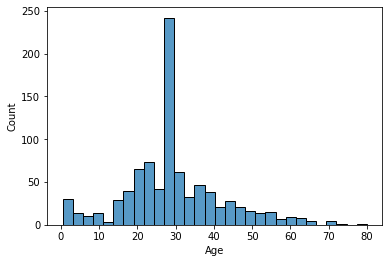

In [36]:
sns.histplot(df["Age"])

<AxesSubplot:xlabel='Age'>

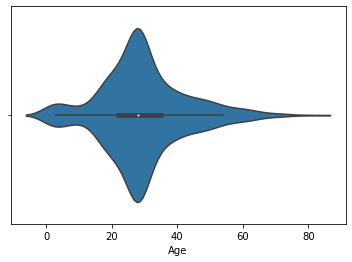

In [37]:
sns.violinplot(df["Age"])

mostly pople in the ship are from 28-30 age group

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

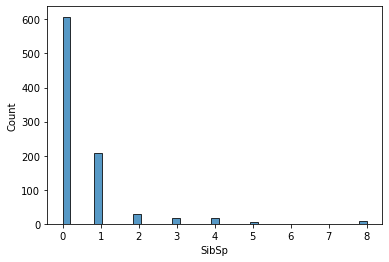

In [38]:
sns.histplot(df["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

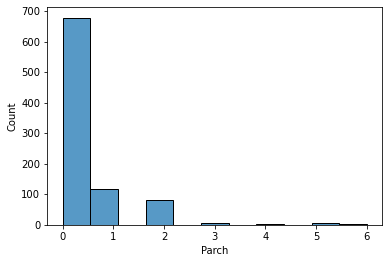

In [39]:
sns.histplot(df["Parch"])

<AxesSubplot:xlabel='Ticket', ylabel='Count'>

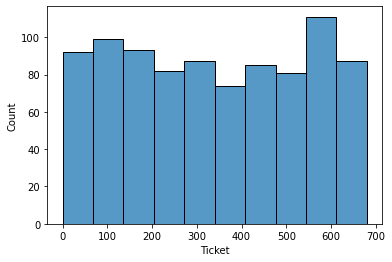

In [40]:
sns.histplot(df["Ticket"],bins = 10)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

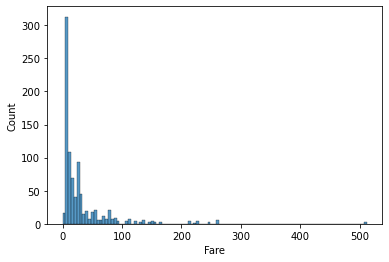

In [41]:
sns.histplot(df["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='count'>

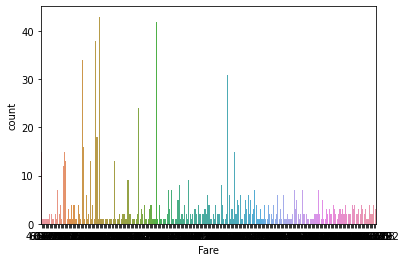

In [42]:
sns.countplot(df["Fare"])

<AxesSubplot:xlabel='Fare'>

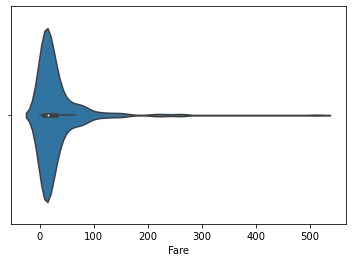

In [43]:
sns.violinplot(df["Fare"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

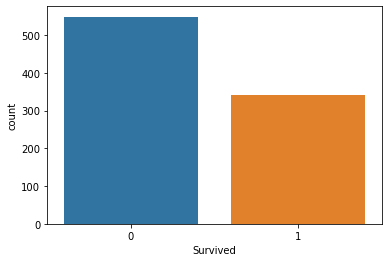

In [44]:
sns.countplot(df["Survived"])

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

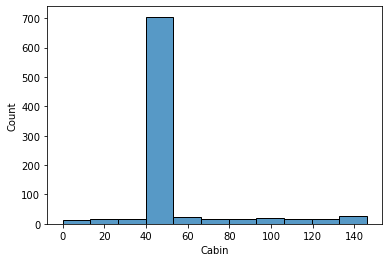

In [45]:
sns.histplot(df["Cabin"])

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

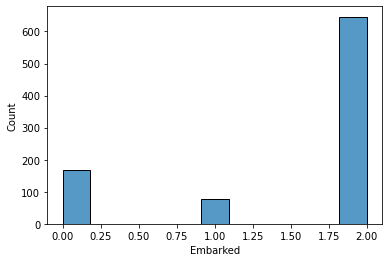

In [46]:
sns.histplot(df["Embarked"])

In [47]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

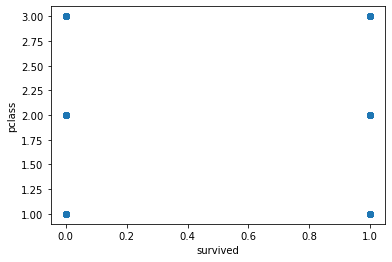

In [48]:
x=df["Survived"]
y=df["Pclass"]
plt.scatter(x,y)
plt.xlabel('survived')
plt.ylabel('pclass')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

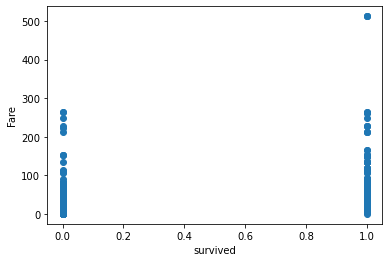

In [49]:
x=df["Survived"]
y=df["Fare"]
plt.scatter(x,y)
plt.xlabel('survived')
plt.ylabel('Fare')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

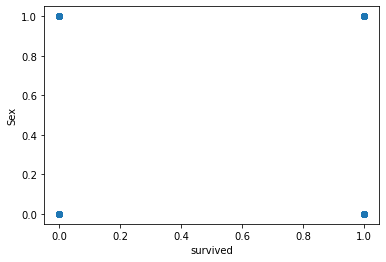

In [50]:
x=df["Survived"]
y=df["Sex"]
plt.scatter(x,y)
plt.xlabel('survived')
plt.ylabel('Sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

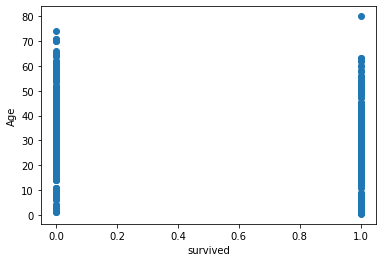

In [51]:
x=df["Survived"]
y=df["Age"]
plt.scatter(x,y)
plt.xlabel('survived')
plt.ylabel('Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

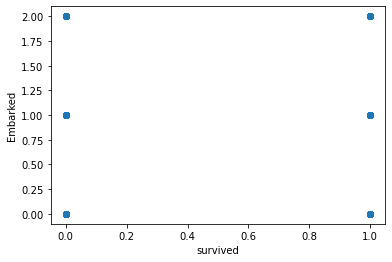

In [52]:
x=df["Survived"]
y=df["Embarked"]
plt.scatter(x,y)
plt.xlabel('survived')
plt.ylabel('Embarked')
plt.show

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

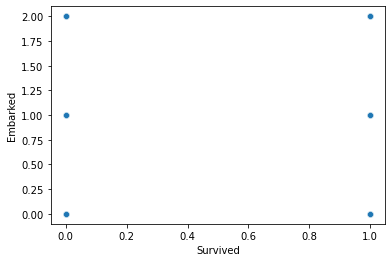

In [53]:
sns.scatterplot(x="Survived",y="Embarked",data = df)

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

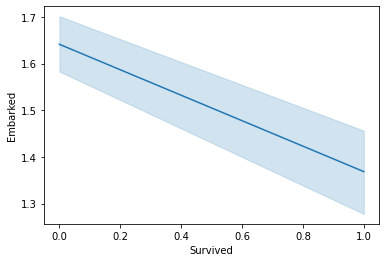

In [54]:
sns.lineplot(x="Survived",y="Embarked",data = df)

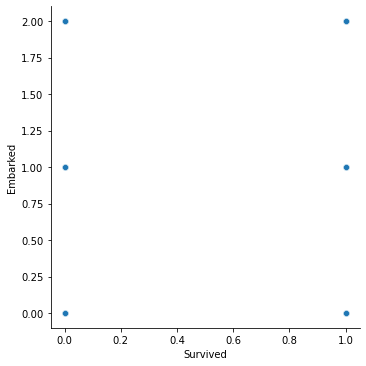

In [55]:
sns.relplot(x="Survived",y="Embarked",data = df)

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

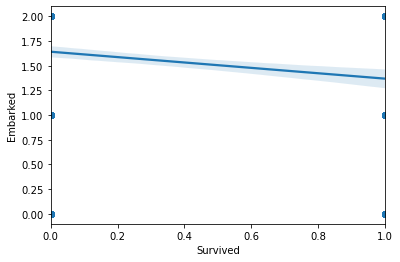

In [56]:
sns.regplot(x="Survived",y="Embarked",data = df)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

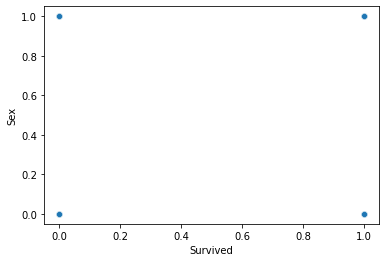

In [57]:
sns.scatterplot(x="Survived",y="Sex",data = df)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

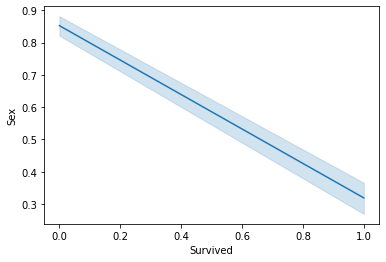

In [58]:
sns.lineplot("Survived","Sex",data = df)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

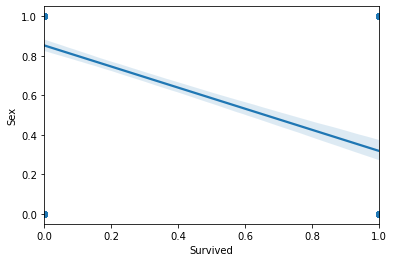

In [59]:
sns.regplot(x="Survived",y="Sex",data = df)

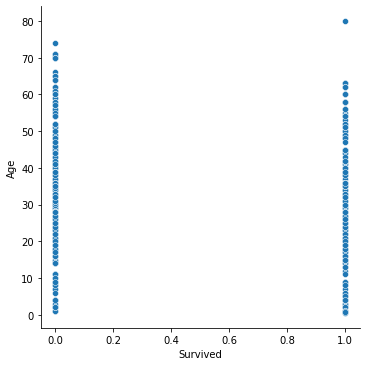

In [60]:
sns.relplot(x="Survived",y="Age",data = df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

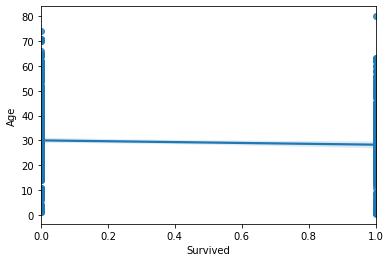

In [61]:
sns.regplot(x="Survived",y="Age",data = df)

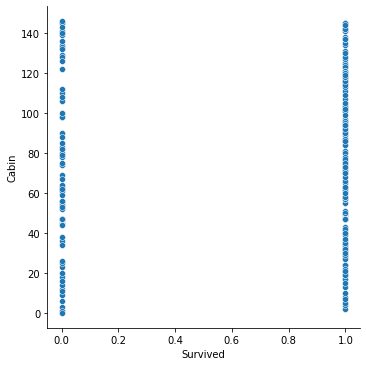

In [62]:
sns.relplot(x="Survived",y="Cabin",data = df)

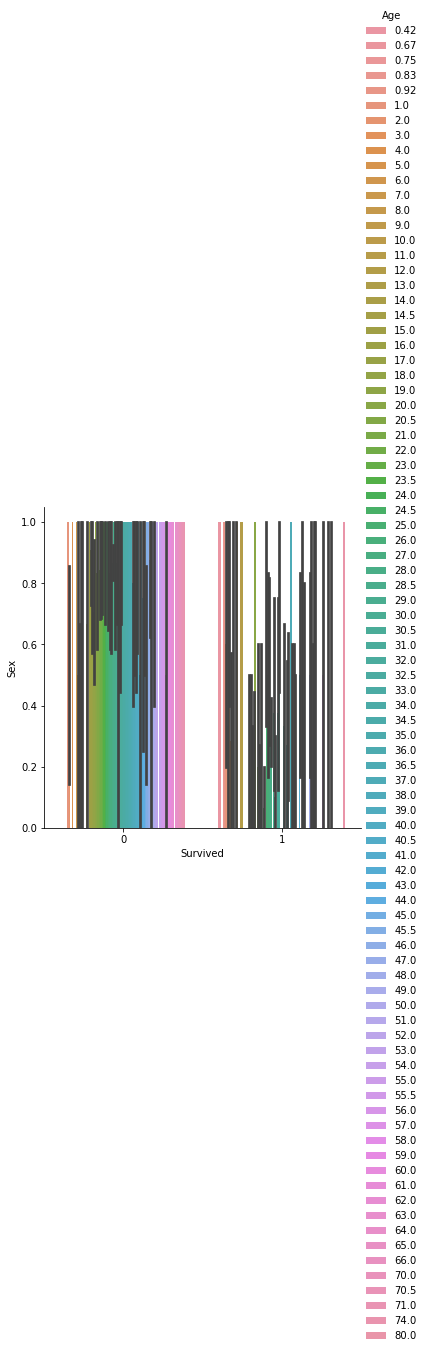

In [63]:
sns.catplot(x= "Survived",y="Sex",hue="Age",kind="bar",data = df)

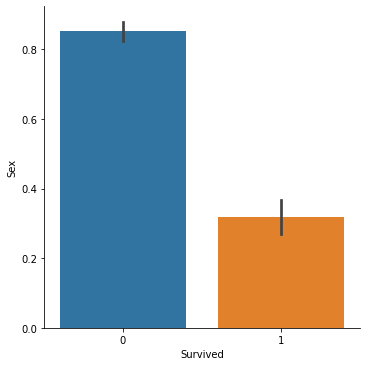

In [64]:
sns.catplot(x= "Survived",y="Sex",kind="bar",data = df)

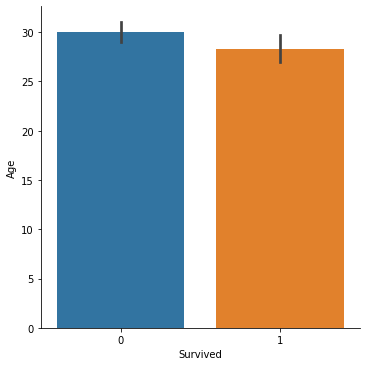

In [65]:
sns.catplot(x= "Survived",y="Age",kind="bar",data = df)

In [66]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

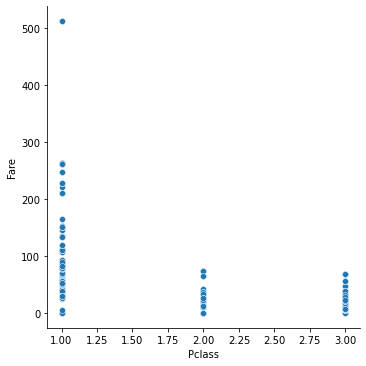

In [67]:
sns.relplot(x="Pclass",y="Fare",data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

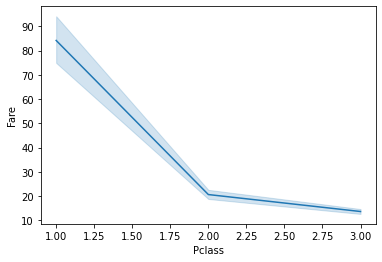

In [68]:
sns.lineplot(x="Pclass",y="Fare",data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

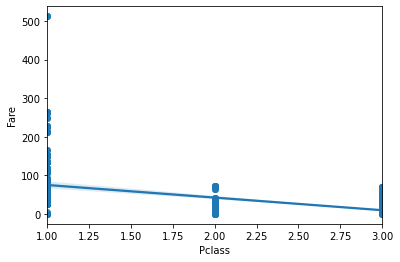

In [69]:
sns.regplot(x="Pclass",y="Fare",data = df)

<AxesSubplot:>

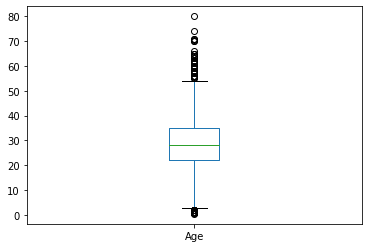

In [70]:
df['Age'].plot.box()

<AxesSubplot:>

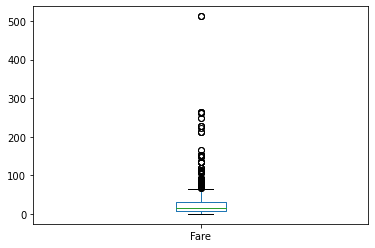

In [71]:
df['Fare'].plot.box()

<AxesSubplot:>

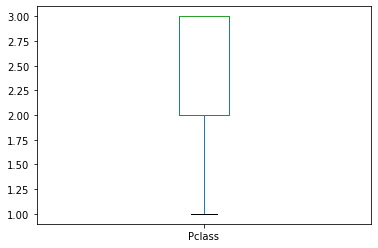

In [72]:
df['Pclass'].plot.box()

<AxesSubplot:>

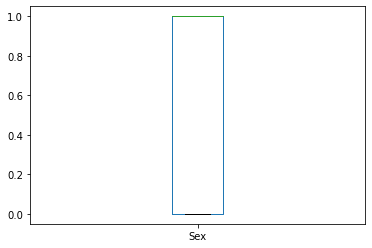

In [73]:
df['Sex'].plot.box()

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

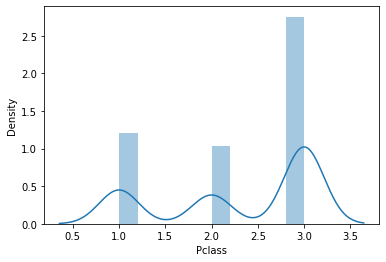

In [74]:
sns.distplot(df["Pclass"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

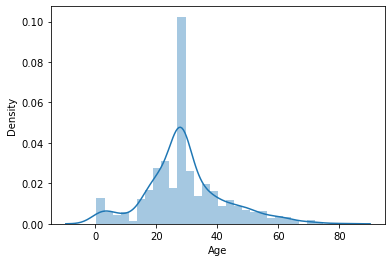

In [75]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

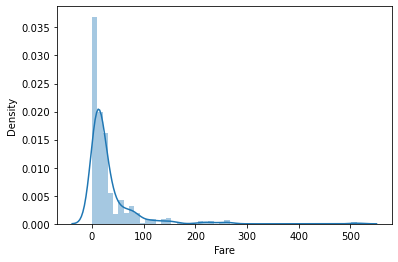

In [76]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

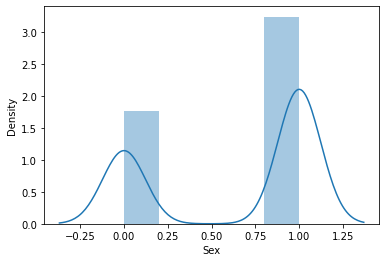

In [77]:
sns.distplot(df["Sex"])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

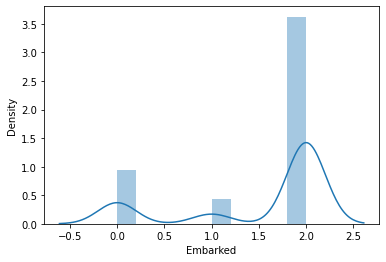

In [78]:
sns.distplot(df["Embarked"])

<AxesSubplot:xlabel='Ticket', ylabel='Density'>

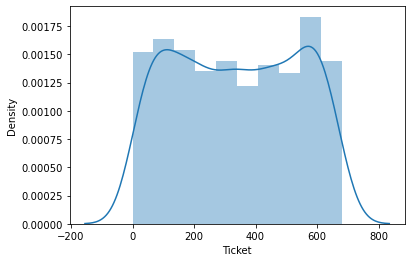

In [79]:
sns.distplot(df["Ticket"])

<AxesSubplot:xlabel='Age'>

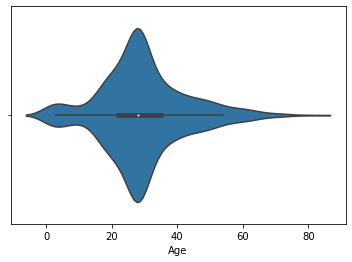

In [80]:
sns.violinplot(df['Age'])

<AxesSubplot:xlabel='Sex'>

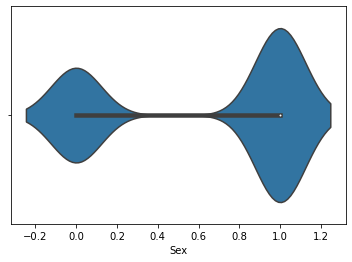

In [81]:
sns.violinplot(df['Sex'])

<AxesSubplot:xlabel='Fare'>

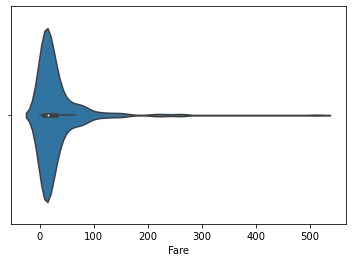

In [82]:
sns.violinplot(df['Fare'])

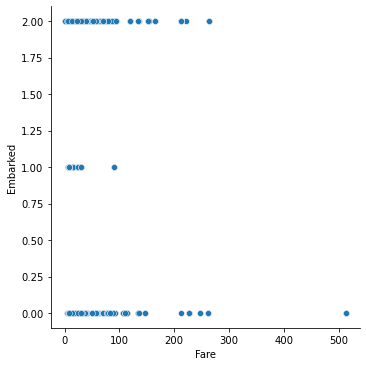

In [83]:
sns.relplot(x="Fare",y="Embarked",data = df)

Survived       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Pclass      AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Sex          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Age         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SibSp       AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Parch             AxesSubplot(0.125,0.125;0.133621x0.343182)
Ticket         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Fare            AxesSubplot(0.44569,0.125;0.133621x0.343182)
Cabin          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Embarked       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

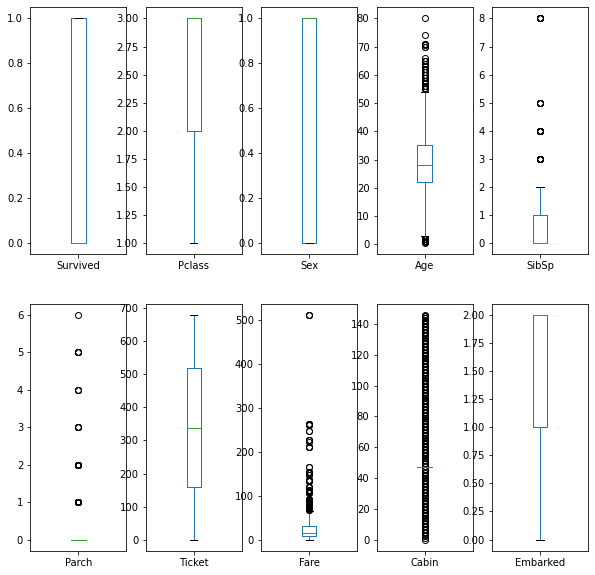

In [84]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

In [85]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

In [86]:
from scipy.stats import skew

Survived
0.4777174662568536


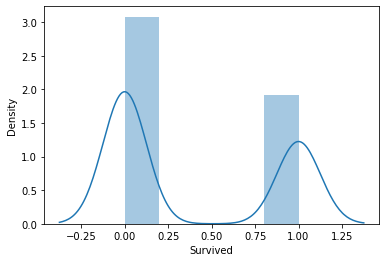

Pclass
-0.6294858816096934


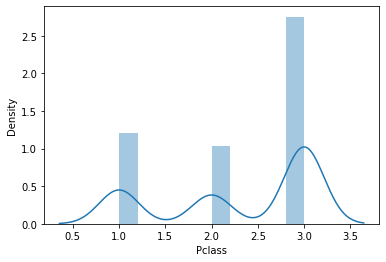

Sex
-0.6178784065548295


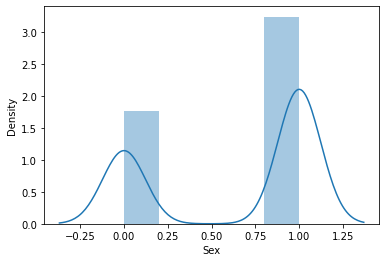

Age
0.5093852558219663


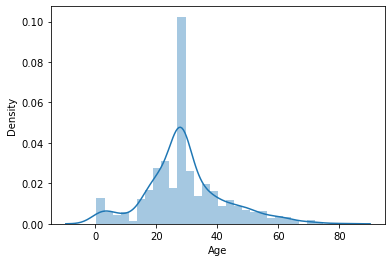

SibSp
3.6891276847759507


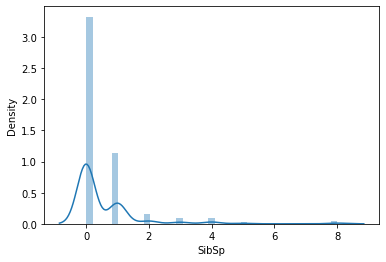

Parch
2.7444867379203735


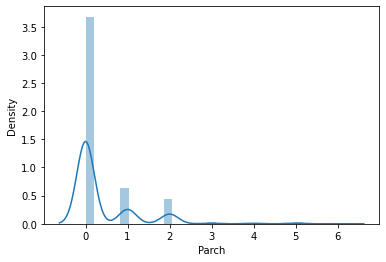

Ticket
0.00024535729906583723


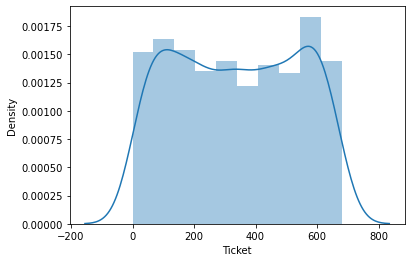

Fare
4.7792532923723545


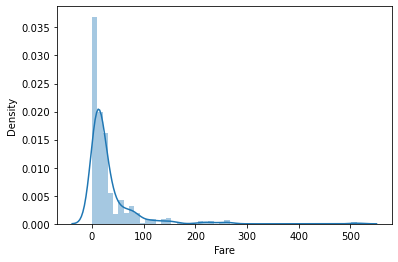

Cabin
2.265104814856884


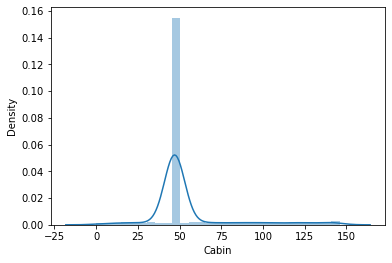

Embarked
-1.2626927433430535


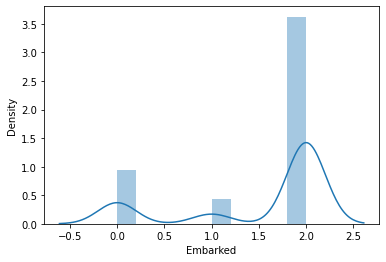

In [87]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [88]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [89]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [90]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

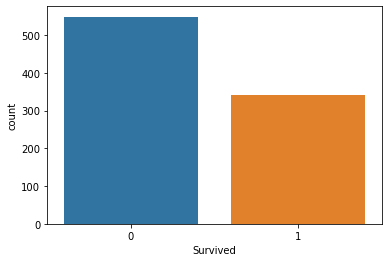

In [91]:
sns.countplot(df['Survived'])

In [92]:
from scipy.stats import zscore

In [93]:
dfcontcols = df[["Age","Fare"]]
z = np.abs(zscore(dfcontcols))
threshold = 3
np.where(z>3)

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
        527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
        851], dtype=int64),
 array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0], dtype=int64))

In [94]:
df_new =  df[(z<3).all(axis=1)]

In [95]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,47,2
1,1,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,0,26.0,0,0,669,7.9250,47,2
3,1,1,0,35.0,1,0,49,53.1000,55,2
4,0,3,1,35.0,0,0,472,8.0500,47,2


In [96]:
df_new.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.321096
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        2.257178
Cabin       2.318723
Embarked   -1.328443
dtype: float64

Survived
0.5011390848341595


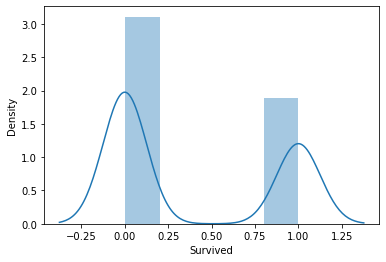

Pclass
-0.7071447315269005


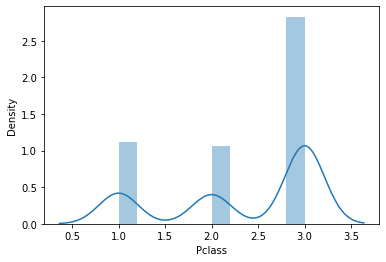

Sex
-0.6311051420806083


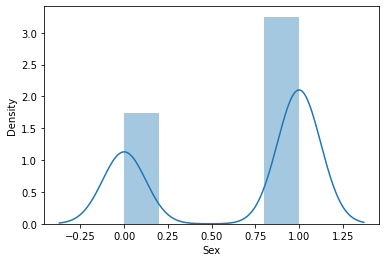

Age
0.32053825888459797


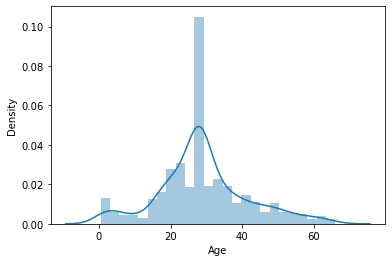

SibSp
3.7452359378432454


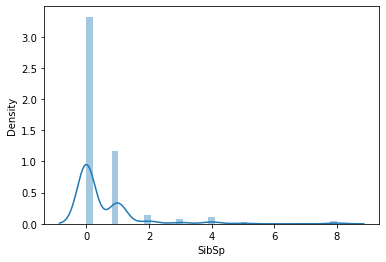

Parch
2.8354783046322978


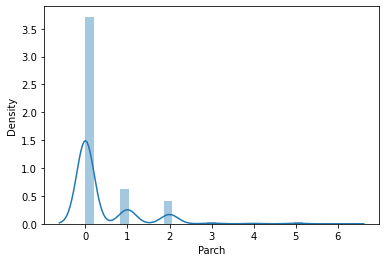

Ticket
0.012463059547104601


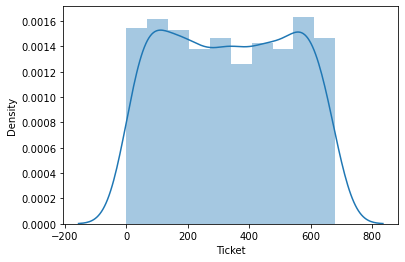

Fare
2.25325712506958


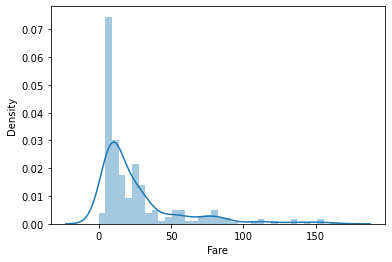

Cabin
2.314695786337867


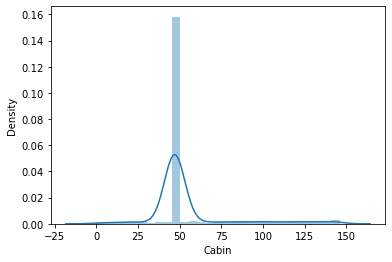

Embarked
-1.3261353999816108


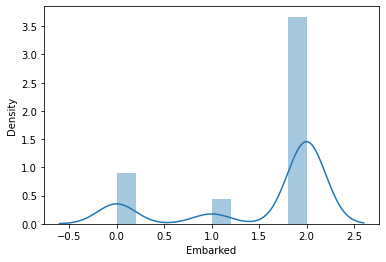

In [97]:
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()

In [98]:
df_new.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.333535,-0.534012,-0.058724,-0.041734,0.080065,-0.175168,0.300795,0.192104,-0.161798
Pclass,-0.333535,1.000000,0.123990,-0.346453,0.093871,0.051075,0.358811,-0.653377,-0.279105,0.132880
Sex,-0.534012,0.123990,1.000000,0.065600,-0.109263,-0.250154,0.061305,-0.234302,-0.106524,0.105550
Age,-0.058724,-0.346453,0.065600,1.000000,-0.232166,-0.186822,-0.097952,0.136972,0.093798,-0.008587
SibSp,-0.041734,0.093871,-0.109263,-0.232166,1.000000,0.408282,0.092892,0.245772,-0.011624,0.063416
Parch,0.080065,0.051075,-0.250154,-0.186822,0.408282,1.000000,0.036884,0.229489,0.022519,0.045652
Ticket,-0.175168,0.358811,0.061305,-0.097952,0.092892,0.036884,1.000000,-0.125695,-0.063557,0.038191
Fare,0.300795,-0.653377,-0.234302,0.136972,0.245772,0.229489,-0.125695,1.000000,0.224007,-0.175340
Cabin,0.192104,-0.279105,-0.106524,0.093798,-0.011624,0.022519,-0.063557,0.224007,1.000000,0.013550
Embarked,-0.161798,0.132880,0.105550,-0.008587,0.063416,0.045652,0.038191,-0.175340,0.013550,1.000000


<AxesSubplot:>

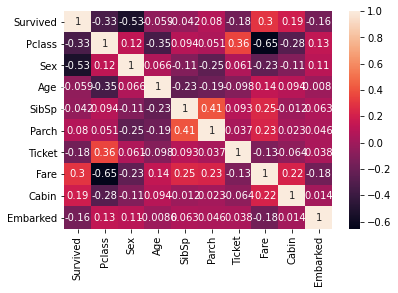

In [99]:
sns.heatmap(df_new.corr(),annot = True)

In [100]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,47,2
1,1,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,0,26.0,0,0,669,7.9250,47,2
3,1,1,0,35.0,1,0,49,53.1000,55,2
4,0,3,1,35.0,0,0,472,8.0500,47,2


In [101]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

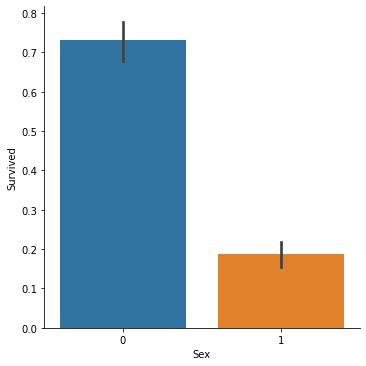

In [102]:
sns.catplot(x="Sex",y="Survived",data=df_new,kind="bar")

Female are more survived than male

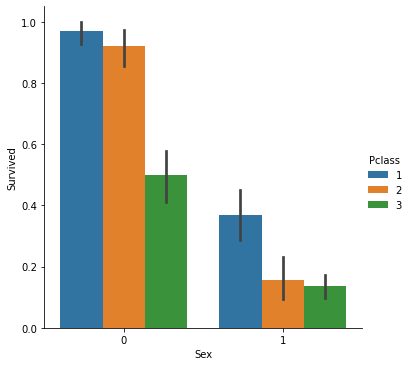

In [103]:
sns.catplot(x="Sex",y="Survived",hue="Pclass",data=df,kind="bar")

female with passenger class 1 are more survived than any other pclass

In [104]:
df_new["Survived"].value_counts()

0    537
1    327
Name: Survived, dtype: int64

In [105]:
df_new.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.321096
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        2.257178
Cabin       2.318723
Embarked   -1.328443
dtype: float64

In [106]:
x = df_new.iloc[:,1:-1]

In [107]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,3,1,22.0,1,0,523,7.2500,47
1,1,0,38.0,1,0,596,71.2833,81
2,3,0,26.0,0,0,669,7.9250,47
3,1,0,35.0,1,0,49,53.1000,55
4,3,1,35.0,0,0,472,8.0500,47


In [108]:
y = df_new.iloc[:,:1]

In [109]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
SM = SMOTE()
x,y = SM.fit_resample(x, y)

In [112]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [113]:
y.value_counts()

Survived
0           537
1           537
dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [116]:
x_train.shape

(859, 8)

In [117]:
x_test.shape

(215, 8)

In [118]:
y_train.shape

(859, 1)

In [119]:
y_test.shape

(215, 1)

In [120]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [121]:
svc= SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6558139534883721
[[75 40]
 [34 66]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       115
           1       0.62      0.66      0.64       100

    accuracy                           0.66       215
   macro avg       0.66      0.66      0.66       215
weighted avg       0.66      0.66      0.66       215



In [122]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8
[[92 23]
 [20 80]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       115
           1       0.78      0.80      0.79       100

    accuracy                           0.80       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.80      0.80      0.80       215



In [123]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7255813953488373
[[77 38]
 [21 79]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       115
           1       0.68      0.79      0.73       100

    accuracy                           0.73       215
   macro avg       0.73      0.73      0.73       215
weighted avg       0.73      0.73      0.73       215



In [124]:
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8325581395348837
[[95 20]
 [16 84]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       115
           1       0.81      0.84      0.82       100

    accuracy                           0.83       215
   macro avg       0.83      0.83      0.83       215
weighted avg       0.83      0.83      0.83       215



In [125]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb =gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))

0.8046511627906977


In [139]:
from sklearn.naive_bayes import MultinomialNB

In [140]:
mnb = MultinomialNB()

In [141]:
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb =mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))

0.641860465116279


In [126]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8119756574657682


In [127]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.6704020865029341


In [128]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7207476635514019


In [129]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.847337535318409


In [130]:
print(cross_val_score(gnb,x,y,cv=5).mean())

0.8036035644425125


In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
parameter = {'max_depth':np.arange(2,10),
              'criterion':['gini','entropy'],
               'splitter':['best','random'],
            'max_features':['auto','sqrt','log2']}

In [133]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [134]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [135]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [136]:
GCV = GridSearchCV(SVC(),parameter,cv=5)